In [1]:
import numpy as num
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
df.drop(['Cabin'], axis=1, inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [7]:
def impute_NaN(df, lt):
    for temp in lt:
        sample=df[temp].dropna().sample(df[temp].isna().sum(), random_state=0)
        sample.index=df[df[temp].isna()].index
        df.loc[df[temp].isna(), temp]=sample

In [8]:
impute_NaN(df, ['Age', 'Embarked'])

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\Abhishek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

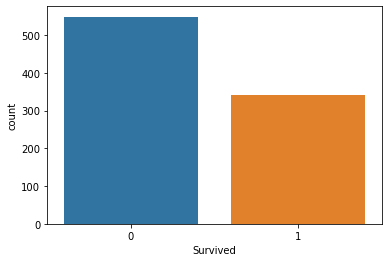

In [10]:
import seaborn as sns

sns.countplot(df['Survived'])

In [11]:
df.drop(['PassengerId','Name','Ticket','Embarked'], axis=1, inplace=True)


In [12]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [14]:
df['Sex']=num.where(df['Sex']=='male',1,0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [15]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [17]:
Logestic_Model=LogisticRegression()
Logestic_Model.fit(x_train,y_train)
Logestic_Model.score(x_test,y_test)

0.7873134328358209

In [18]:
from sklearn.tree import DecisionTreeClassifier
Decision_tree_Model=DecisionTreeClassifier()
Decision_tree_Model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
Decision_tree_Model.score(x_test,y_test)

0.7761194029850746

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
predict_val=Decision_tree_Model.predict(x_test)
accuracy_score(y_test,predict_val)

0.7761194029850746

## Hyper-Parameter Tuning

In [21]:
from sklearn.model_selection import RandomizedSearchCV

param={
    'criterion':['gini','entropy'],
    'max_depth':range(2,25,1),
    'min_samples_split':[2,5,7,8,9,11,12,13],
    'min_samples_leaf':[2,3,5,7,9,8],
    'max_features':["auto", "sqrt", "log2"],
    'max_leaf_nodes':range(2,10,1)
}

In [22]:
Rand_Madel=RandomizedSearchCV(DecisionTreeClassifier(), param,n_iter=10,n_jobs=-1,cv=5,verbose=2)

In [23]:
Rand_Madel.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 25),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': range(2, 10),
                                        'min_samples_leaf': [2, 3, 5, 7, 9, 8],
                                        'min_samples_split': [2, 5, 7, 8, 9, 11,
                                                              12, 13]},
                   verbose=2)

### Find best Madel

In [24]:
Rand_Madel.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 9,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [25]:
Decision_tree_Madel=DecisionTreeClassifier(min_samples_split=8,min_samples_leaf=2,max_leaf_nodes=9,max_features='sqrt',
 max_depth=8,criterion='entropy')

In [26]:
Decision_tree_Madel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=9, min_samples_leaf=2,
                       min_samples_split=8)

In [27]:
Decision_tree_Madel.score(x_test,y_test)

0.8022388059701493

In [28]:
predict_val=Decision_tree_Madel.predict(x_test)

In [29]:
accuracy_score(y_test,predict_val)

0.8022388059701493

In [30]:
confusion_matrix(y_test,predict_val)

array([[137,  20],
       [ 33,  78]], dtype=int64)

In [32]:
print(classification_report(y_test,predict_val))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

